Epoch 0/5, Loss: 0.6570868100868184, CPU Utilization: 35.7%, Memory Utilization: 53.1%
Total Training Time: 5.0059144496917725 seconds


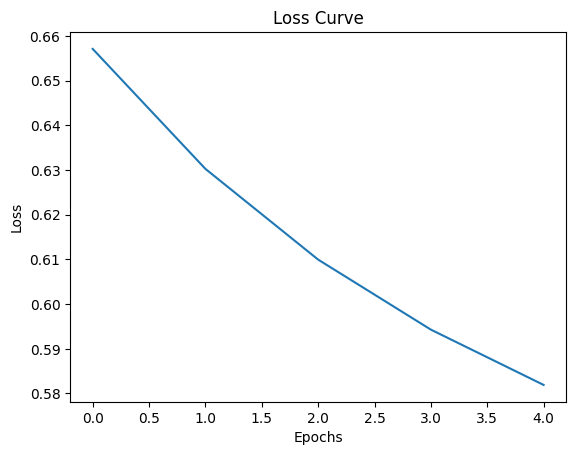

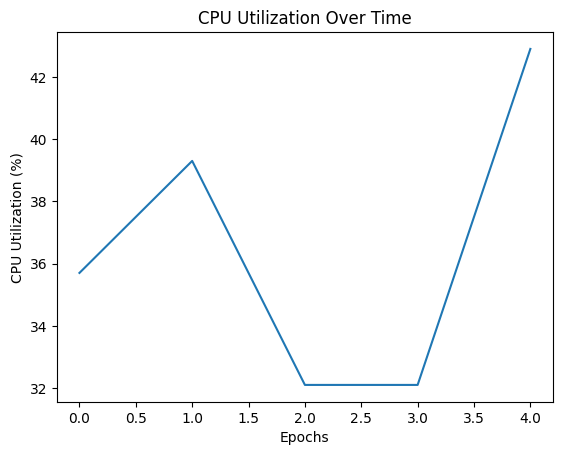

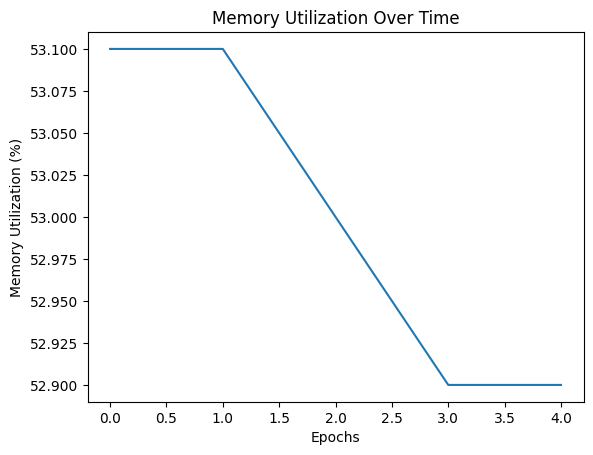

Test Accuracy: 66.67%


In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import psutil

# Function to get CPU utilization
def get_cpu_utilization():
    return psutil.cpu_percent(interval=0.1)

# Function to get memory utilization
def get_memory_utilization():
    return psutil.virtual_memory().percent

# Load Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification, setosa or not

# Add bias term to X
X = np.insert(X, 0, 1, axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function (cross-entropy loss)
def compute_loss(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return loss

# Gradient descent optimization
def gradient_descent(X, y, theta, learning_rate, epochs):
    m = len(y)
    losses = []
    cpu_utilization = []
    memory_utilization = []

    start_time = time.time()

    for epoch in range(epochs):
        epoch_start_time = time.time()

        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient

        # Compute and store the loss for visualization
        loss = compute_loss(X, y, theta)
        losses.append(loss)

        # Log CPU utilization and memory consumption
        cpu = get_cpu_utilization()
        memory = get_memory_utilization()
        cpu_utilization.append(cpu)
        memory_utilization.append(memory)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}/{epochs}, Loss: {loss}, CPU Utilization: {cpu}%, Memory Utilization: {memory}%')

        epoch_elapsed_time = time.time() - epoch_start_time
        time.sleep(max(0, 1 - epoch_elapsed_time))  # Ensure at least 1 second between measurements

    total_elapsed_time = time.time() - start_time
    print(f'Total Training Time: {total_elapsed_time} seconds')

    return theta, losses, cpu_utilization, memory_utilization

# Initialize weights
theta = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
epochs = 5

# Train the model
theta, losses, cpu_utilization, memory_utilization = gradient_descent(X_train, y_train, theta, learning_rate, epochs)

# Plot the loss curve
plt.plot(losses)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot CPU utilization over time
plt.plot(cpu_utilization)
plt.title('CPU Utilization Over Time')
plt.xlabel('Epochs')
plt.ylabel('CPU Utilization (%)')
plt.show()

# Plot memory utilization over time
plt.plot(memory_utilization)
plt.title('Memory Utilization Over Time')
plt.xlabel('Epochs')
plt.ylabel('Memory Utilization (%)')
plt.show()

# Make predictions on the test set
def predict(X, theta, threshold=0.5):
    probabilities = sigmoid(np.dot(X, theta))
    predictions = (probabilities >= threshold).astype(int)
    return predictions

# Evaluate the model
y_pred = predict(X_test, theta)
accuracy = np.mean(y_pred == y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 0/5, Loss: 0.6570868100868184, CPU Utilization: 37.5%, Memory Utilization: 52.2%
Total Training Time: 5.0049145221710205 seconds


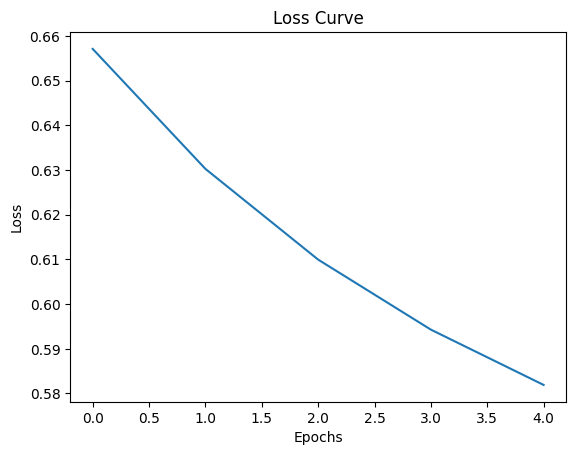

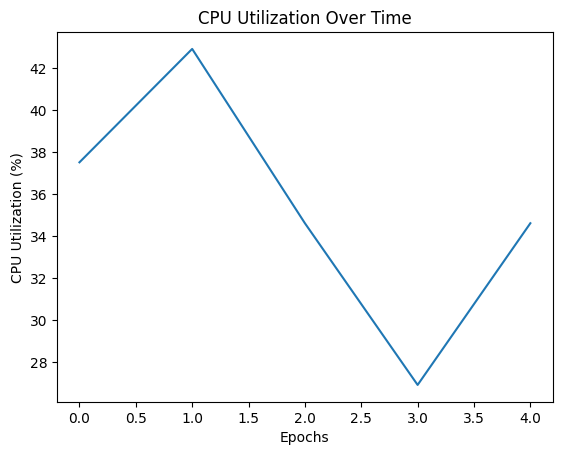

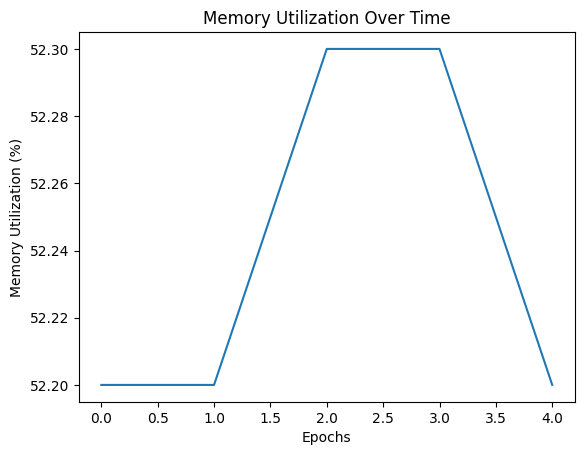

Test Accuracy: 66.67%


In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import psutil

# Function to get CPU utilization
def get_cpu_utilization():
    return psutil.cpu_percent(interval=0.1)

# Function to get memory utilization
def get_memory_utilization():
    return psutil.virtual_memory().percent

# Load Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification, setosa or not

# Add bias term to X
X = np.insert(X, 0, 1, axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function (cross-entropy loss)
def compute_loss(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return loss

# Gradient descent optimization
def gradient_descent(X, y, theta, learning_rate, epochs):
    m = len(y)
    losses = []
    cpu_utilization = []
    memory_utilization = []

    start_time = time.time()

    for epoch in range(epochs):
        epoch_start_time = time.time()

        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient

        # Compute and store the loss for visualization
        loss = compute_loss(X, y, theta)
        losses.append(loss)

        # Log CPU utilization and memory consumption
        cpu = get_cpu_utilization()
        memory = get_memory_utilization()
        cpu_utilization.append(cpu)
        memory_utilization.append(memory)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}/{epochs}, Loss: {loss}, CPU Utilization: {cpu}%, Memory Utilization: {memory}%')

        epoch_elapsed_time = time.time() - epoch_start_time
        time.sleep(max(0, 1 - epoch_elapsed_time))  # Ensure at least 1 second between measurements

    total_elapsed_time = time.time() - start_time
    print(f'Total Training Time: {total_elapsed_time} seconds')

    return theta, losses, cpu_utilization, memory_utilization

# Initialize weights
theta = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
epochs = 5

# Train the model
theta, losses, cpu_utilization, memory_utilization = gradient_descent(X_train, y_train, theta, learning_rate, epochs)

# Plot the loss curve
plt.plot(losses)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot CPU utilization over time
plt.plot(cpu_utilization)
plt.title('CPU Utilization Over Time')
plt.xlabel('Epochs')
plt.ylabel('CPU Utilization (%)')
plt.show()

# Plot memory utilization over time
plt.plot(memory_utilization)
plt.title('Memory Utilization Over Time')
plt.xlabel('Epochs')
plt.ylabel('Memory Utilization (%)')
plt.show()

# Make predictions on the test set
def predict(X, theta, threshold=0.5):
    probabilities = sigmoid(np.dot(X, theta))
    predictions = (probabilities >= threshold).astype(int)
    return predictions

# Evaluate the model
y_pred = predict(X_test, theta)
accuracy = np.mean(y_pred == y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 0/5, Loss: 0.6570868100868184, CPU Utilization: 39.3%, Memory Utilization: 52.3%
Total Training Time: 5.005914926528931 seconds


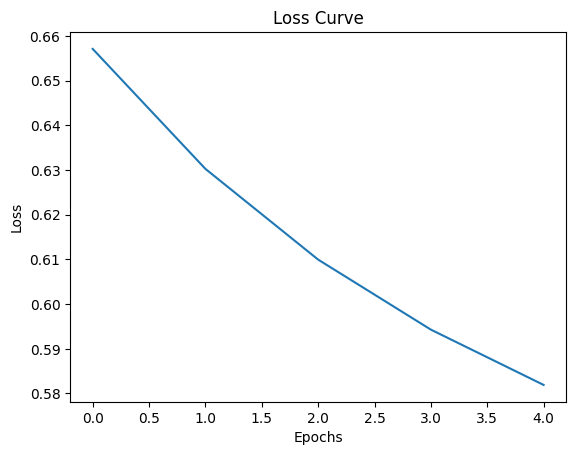

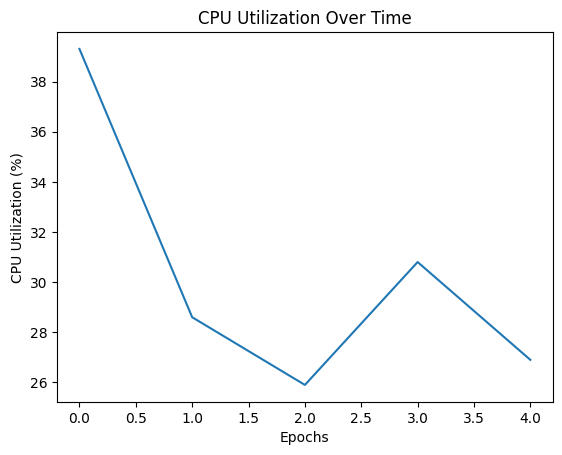

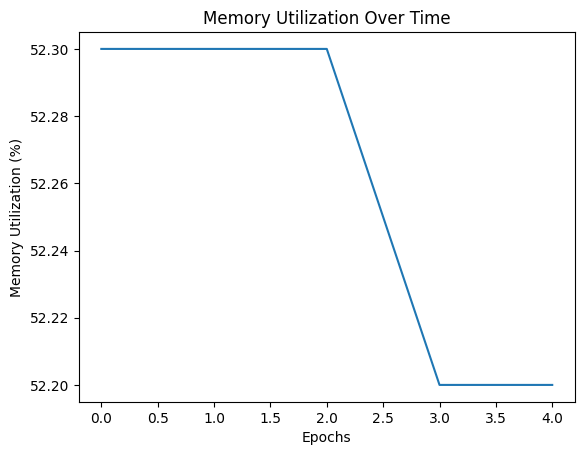

Test Accuracy: 66.67%


In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import psutil

# Function to get CPU utilization
def get_cpu_utilization():
    return psutil.cpu_percent(interval=0.1)

# Function to get memory utilization
def get_memory_utilization():
    return psutil.virtual_memory().percent

# Load Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification, setosa or not

# Add bias term to X
X = np.insert(X, 0, 1, axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function (cross-entropy loss)
def compute_loss(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return loss

# Gradient descent optimization
def gradient_descent(X, y, theta, learning_rate, epochs):
    m = len(y)
    losses = []
    cpu_utilization = []
    memory_utilization = []

    start_time = time.time()

    for epoch in range(epochs):
        epoch_start_time = time.time()

        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient

        # Compute and store the loss for visualization
        loss = compute_loss(X, y, theta)
        losses.append(loss)

        # Log CPU utilization and memory consumption
        cpu = get_cpu_utilization()
        memory = get_memory_utilization()
        cpu_utilization.append(cpu)
        memory_utilization.append(memory)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}/{epochs}, Loss: {loss}, CPU Utilization: {cpu}%, Memory Utilization: {memory}%')

        epoch_elapsed_time = time.time() - epoch_start_time
        time.sleep(max(0, 1 - epoch_elapsed_time))  # Ensure at least 1 second between measurements

    total_elapsed_time = time.time() - start_time
    print(f'Total Training Time: {total_elapsed_time} seconds')

    return theta, losses, cpu_utilization, memory_utilization

# Initialize weights
theta = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
epochs = 5

# Train the model
theta, losses, cpu_utilization, memory_utilization = gradient_descent(X_train, y_train, theta, learning_rate, epochs)

# Plot the loss curve
plt.plot(losses)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot CPU utilization over time
plt.plot(cpu_utilization)
plt.title('CPU Utilization Over Time')
plt.xlabel('Epochs')
plt.ylabel('CPU Utilization (%)')
plt.show()

# Plot memory utilization over time
plt.plot(memory_utilization)
plt.title('Memory Utilization Over Time')
plt.xlabel('Epochs')
plt.ylabel('Memory Utilization (%)')
plt.show()

# Make predictions on the test set
def predict(X, theta, threshold=0.5):
    probabilities = sigmoid(np.dot(X, theta))
    predictions = (probabilities >= threshold).astype(int)
    return predictions

# Evaluate the model
y_pred = predict(X_test, theta)
accuracy = np.mean(y_pred == y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 0/5, Loss: 0.6570868100868184, CPU Utilization: 41.7%, Memory Utilization: 52.4%
Total Training Time: 5.005913019180298 seconds


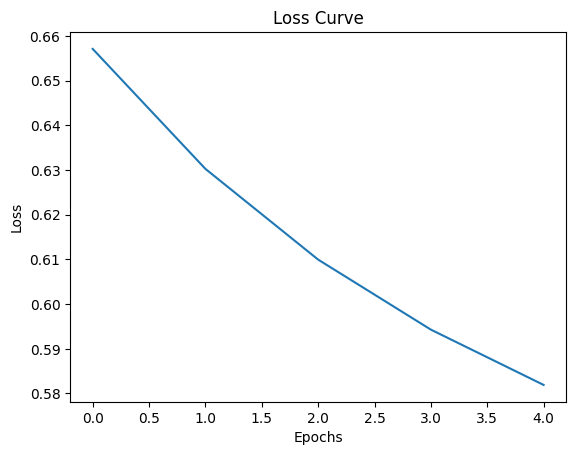

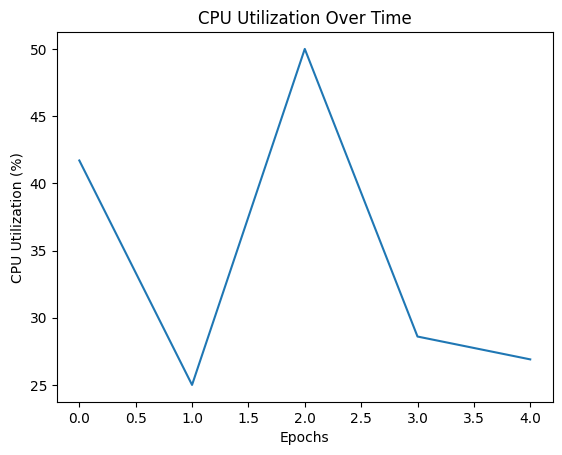

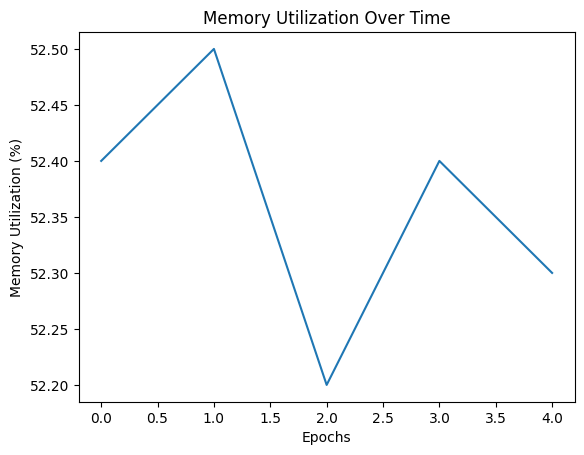

Test Accuracy: 66.67%


In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import psutil

# Function to get CPU utilization
def get_cpu_utilization():
    return psutil.cpu_percent(interval=0.1)

# Function to get memory utilization
def get_memory_utilization():
    return psutil.virtual_memory().percent

# Load Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification, setosa or not

# Add bias term to X
X = np.insert(X, 0, 1, axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function (cross-entropy loss)
def compute_loss(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return loss

# Gradient descent optimization
def gradient_descent(X, y, theta, learning_rate, epochs):
    m = len(y)
    losses = []
    cpu_utilization = []
    memory_utilization = []

    start_time = time.time()

    for epoch in range(epochs):
        epoch_start_time = time.time()

        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient

        # Compute and store the loss for visualization
        loss = compute_loss(X, y, theta)
        losses.append(loss)

        # Log CPU utilization and memory consumption
        cpu = get_cpu_utilization()
        memory = get_memory_utilization()
        cpu_utilization.append(cpu)
        memory_utilization.append(memory)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}/{epochs}, Loss: {loss}, CPU Utilization: {cpu}%, Memory Utilization: {memory}%')

        epoch_elapsed_time = time.time() - epoch_start_time
        time.sleep(max(0, 1 - epoch_elapsed_time))  # Ensure at least 1 second between measurements

    total_elapsed_time = time.time() - start_time
    print(f'Total Training Time: {total_elapsed_time} seconds')

    return theta, losses, cpu_utilization, memory_utilization

# Initialize weights
theta = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
epochs = 5

# Train the model
theta, losses, cpu_utilization, memory_utilization = gradient_descent(X_train, y_train, theta, learning_rate, epochs)

# Plot the loss curve
plt.plot(losses)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot CPU utilization over time
plt.plot(cpu_utilization)
plt.title('CPU Utilization Over Time')
plt.xlabel('Epochs')
plt.ylabel('CPU Utilization (%)')
plt.show()

# Plot memory utilization over time
plt.plot(memory_utilization)
plt.title('Memory Utilization Over Time')
plt.xlabel('Epochs')
plt.ylabel('Memory Utilization (%)')
plt.show()

# Make predictions on the test set
def predict(X, theta, threshold=0.5):
    probabilities = sigmoid(np.dot(X, theta))
    predictions = (probabilities >= threshold).astype(int)
    return predictions

# Evaluate the model
y_pred = predict(X_test, theta)
accuracy = np.mean(y_pred == y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 0/5, Loss: 0.6570868100868184, CPU Utilization: 46.2%, Memory Utilization: 52.1%
Total Training Time: 5.005916118621826 seconds


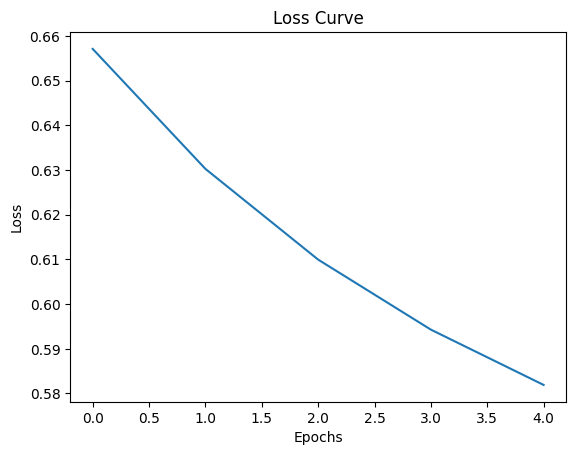

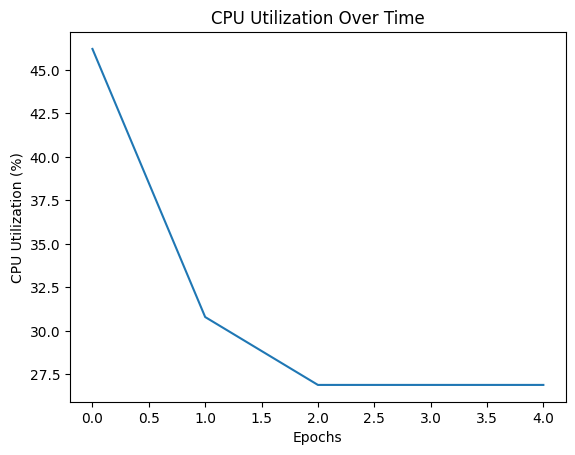

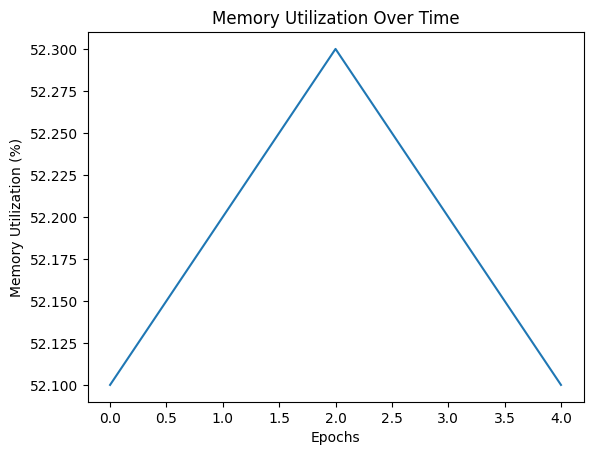

Test Accuracy: 66.67%


In [9]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import psutil

# Function to get CPU utilization
def get_cpu_utilization():
    return psutil.cpu_percent(interval=0.1)

# Function to get memory utilization
def get_memory_utilization():
    return psutil.virtual_memory().percent

# Load Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification, setosa or not

# Add bias term to X
X = np.insert(X, 0, 1, axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function (cross-entropy loss)
def compute_loss(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return loss

# Gradient descent optimization
def gradient_descent(X, y, theta, learning_rate, epochs):
    m = len(y)
    losses = []
    cpu_utilization = []
    memory_utilization = []

    start_time = time.time()

    for epoch in range(epochs):
        epoch_start_time = time.time()

        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient

        # Compute and store the loss for visualization
        loss = compute_loss(X, y, theta)
        losses.append(loss)

        # Log CPU utilization and memory consumption
        cpu = get_cpu_utilization()
        memory = get_memory_utilization()
        cpu_utilization.append(cpu)
        memory_utilization.append(memory)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}/{epochs}, Loss: {loss}, CPU Utilization: {cpu}%, Memory Utilization: {memory}%')

        epoch_elapsed_time = time.time() - epoch_start_time
        time.sleep(max(0, 1 - epoch_elapsed_time))  # Ensure at least 1 second between measurements

    total_elapsed_time = time.time() - start_time
    print(f'Total Training Time: {total_elapsed_time} seconds')

    return theta, losses, cpu_utilization, memory_utilization

# Initialize weights
theta = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
epochs = 5

# Train the model
theta, losses, cpu_utilization, memory_utilization = gradient_descent(X_train, y_train, theta, learning_rate, epochs)

# Plot the loss curve
plt.plot(losses)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot CPU utilization over time
plt.plot(cpu_utilization)
plt.title('CPU Utilization Over Time')
plt.xlabel('Epochs')
plt.ylabel('CPU Utilization (%)')
plt.show()

# Plot memory utilization over time
plt.plot(memory_utilization)
plt.title('Memory Utilization Over Time')
plt.xlabel('Epochs')
plt.ylabel('Memory Utilization (%)')
plt.show()

# Make predictions on the test set
def predict(X, theta, threshold=0.5):
    probabilities = sigmoid(np.dot(X, theta))
    predictions = (probabilities >= threshold).astype(int)
    return predictions

# Evaluate the model
y_pred = predict(X_test, theta)
accuracy = np.mean(y_pred == y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


#Average Time Calculation:

In [11]:
def calculate_average_time(times):
    if not times:
        return 0  # Avoid division by zero if the list is empty
    total_seconds = sum(time.total_seconds() for time in times)
    average_seconds = total_seconds / len(times)
    average_time = timedelta(seconds=average_seconds)
    return average_time

In [13]:
from datetime import timedelta

time_values = [timedelta( seconds=5.0059),
               timedelta( seconds=5.0049),
               timedelta( seconds=5.0059),
               timedelta( seconds=5.0059),
               timedelta( seconds=5.0059)]

average_time = calculate_average_time(time_values)
print(f"Average Time: {average_time}")


Average Time: 0:00:05.005700


In [19]:
def calculate_average_percentage(percentages):
    if not percentages:
        return 0  # Avoid division by zero if the list is empty
    total_percentage = sum(percentages)
    average_percentage = total_percentage / len(percentages)
    return average_percentage

In [20]:
percentage_values = [35.7,37.5,39.3,41.7,46.2]

average_percentage = calculate_average_percentage(percentage_values)
print(f"Average Percentage of Cpu utilization: {average_percentage}%")

Average Percentage: 40.08%


In [22]:
percentage_values = [53.1,52.2,52.3,52.4,52.1]

average_percentage = calculate_average_percentage(percentage_values)
print(f"Average Percentage of Memory Utilization: {average_percentage}%")

Average Percentage: 52.42%


# Conversion Of Percentage Value to normal Value

In [1]:
def percentage_to_normal(percentage):
    
    normal_value = percentage / 100.0
    return normal_value

# Example usage:
percentage_value = 40.08
normal_value = percentage_to_normal(percentage_value)

print(f"{percentage_value}% is equivalent to {normal_value} as a normal value.")


40.08% is equivalent to 0.4008 as a normal value.


# Power Utilization Of This Algo

In [2]:
Power=((1-0.4008)*10)+(0.4008*(77))
Power

36.8536

# Energy Consumption:

In [3]:
Energy=5.0057*36.8536
Energy

184.47806552

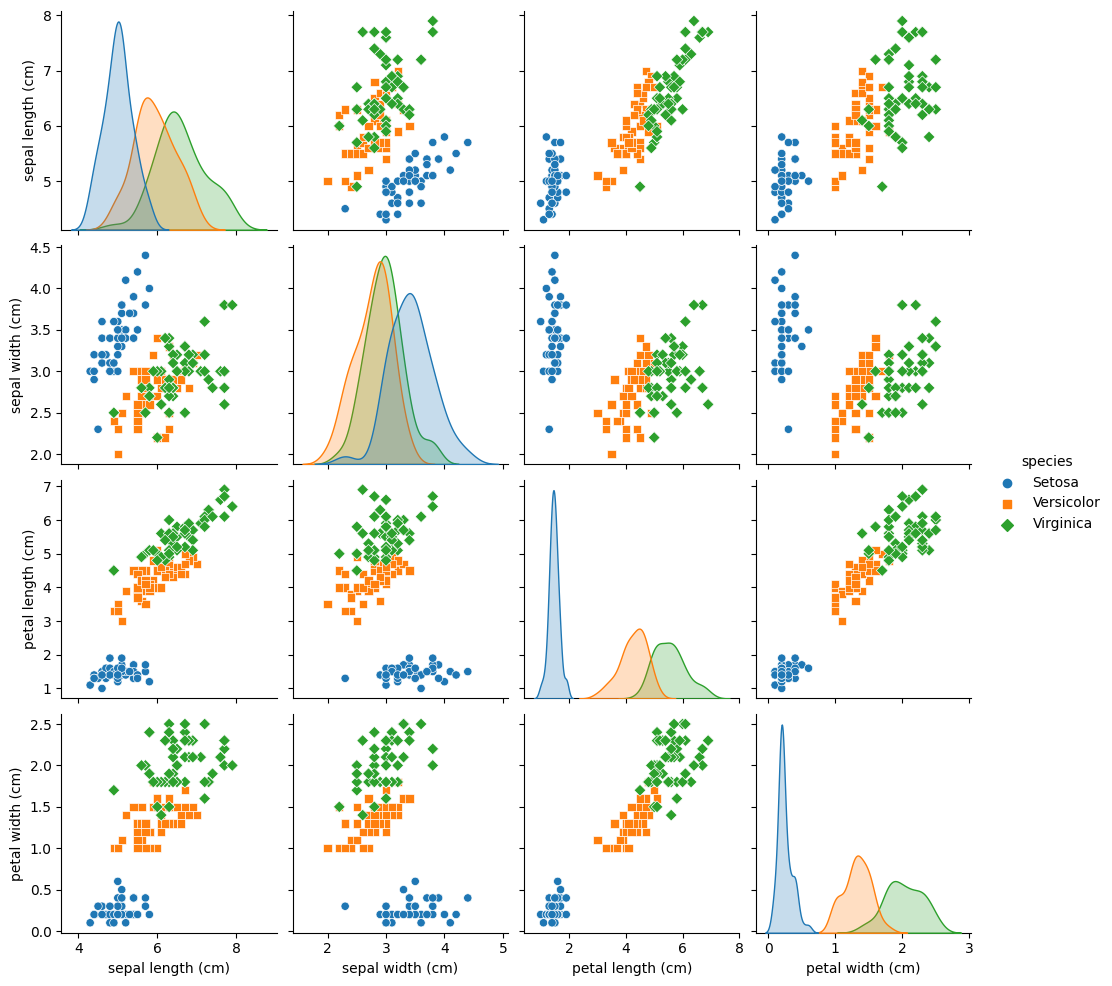

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Map numerical labels to species names
species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
iris_df['species'] = iris_df['species'].map(species_map)

# Create pairplot using Seaborn
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])

# Display the plot
plt.show()


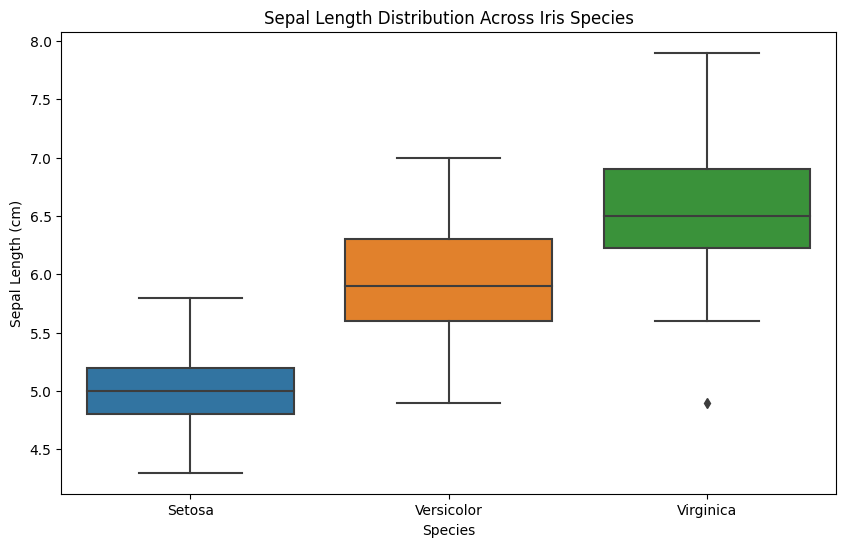

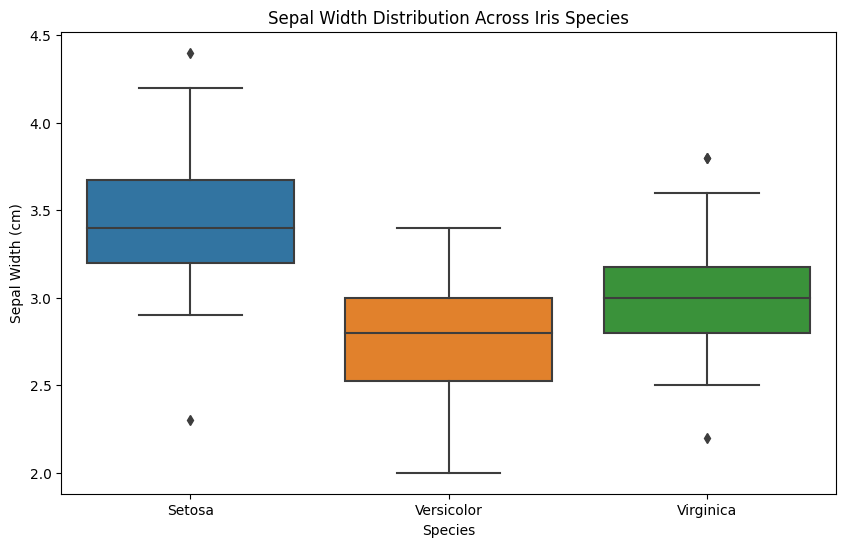

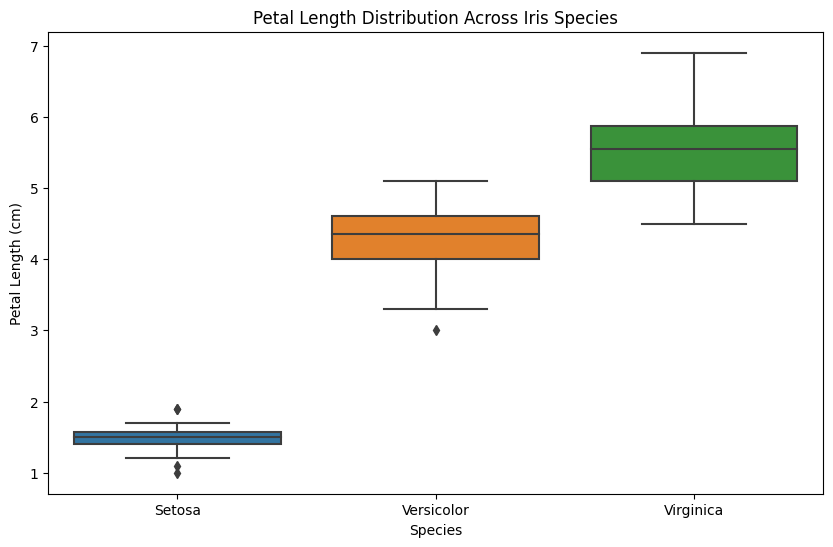

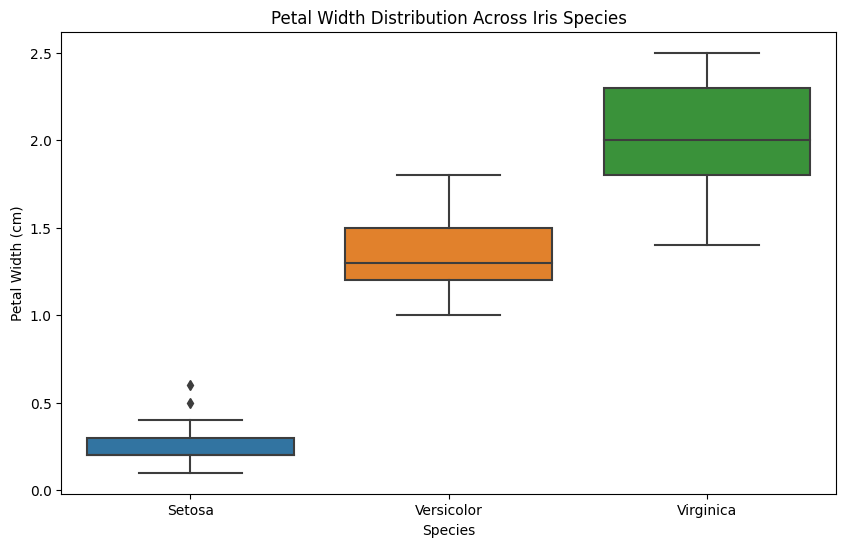

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Map numerical labels to species names
species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
iris_df['species'] = iris_df['species'].map(species_map)

# Create boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='species', y='sepal length (cm)')
plt.title('Sepal Length Distribution Across Iris Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='species', y='sepal width (cm)')
plt.title('Sepal Width Distribution Across Iris Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='species', y='petal length (cm)')
plt.title('Petal Length Distribution Across Iris Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='species', y='petal width (cm)')
plt.title('Petal Width Distribution Across Iris Species')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.show()


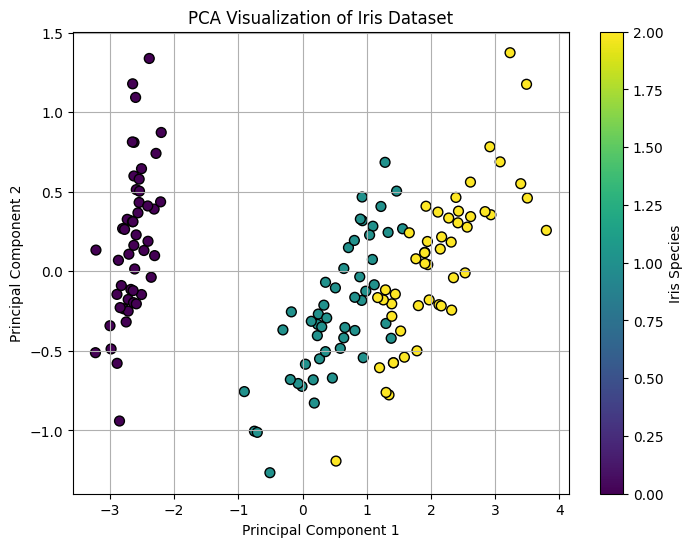

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA Visualization of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Iris Species')
plt.grid(True)
plt.show()


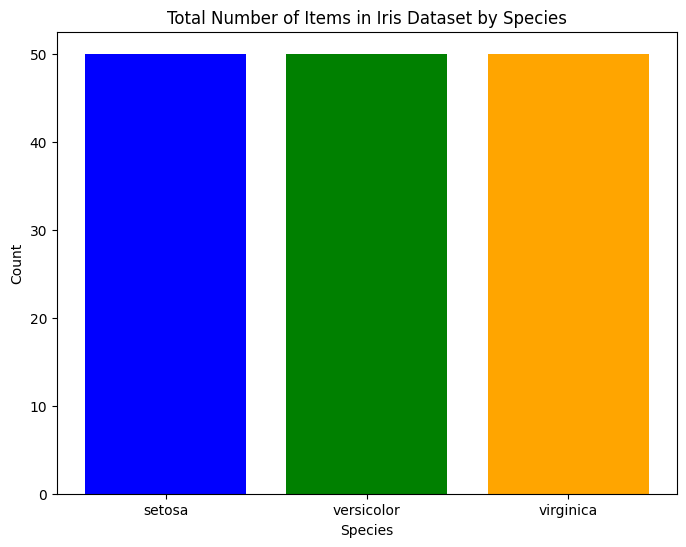

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
species_names = iris.target_names
species_count = []

# Count the occurrences of each species
for species_name in species_names:
    count = (iris.target == list(iris.target_names).index(species_name)).sum()
    species_count.append(count)

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(species_names, species_count, color=['blue', 'green', 'orange'])
plt.title('Total Number of Items in Iris Dataset by Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


In [8]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the Iris data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Map numerical labels to species names
species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
iris_df['species'] = iris_df['species'].map(species_map)

# Count the occurrences of each species
species_counts = iris_df['species'].value_counts()

print("Total number of items in Iris dataset:", len(iris_df))
print("Number of items in Setosa:", species_counts['Setosa'])
print("Number of items in Versicolor:", species_counts['Versicolor'])
print("Number of items in Virginica:", species_counts['Virginica'])


Total number of items in Iris dataset: 150
Number of items in Setosa: 50
Number of items in Versicolor: 50
Number of items in Virginica: 50
